In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns

In [2]:
data=pd.read_csv('Suppoerting material.csv',index_col='Run')

In [3]:
d1=data[['TCP (%)','Compression Pressure (MPa)','Screen shape  round','Particle size (%)150 - 250 µm','Ha (mm)',
       'Hb (mm)', 'Hc (mm)','IAR (%)', 'CAR (%)',
       'VSR (%)', 'Elastic work (Nm)']]

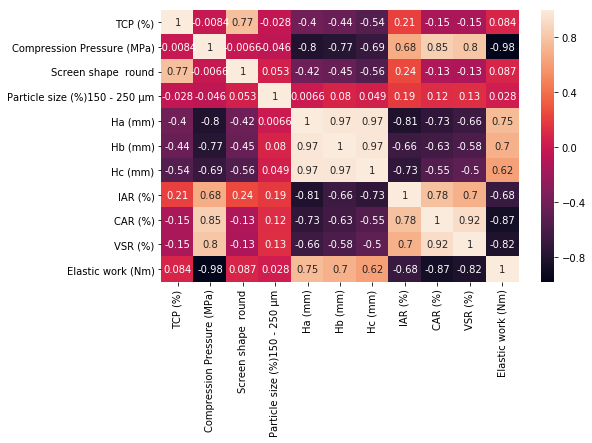

In [10]:
plot.rcParams["figure.figsize"] = [8,5]
sns.heatmap(d1.corr(), annot= True)

In [4]:
data.columns

Index(['TCP (%)', 'SSG (%)', 'Screen size (mm)', 'Screen shape  square',
       'Screen shape  round', 'Water (%)', 'Particle size (%)> 500 µm',
       'Particle size (%)250 - 500 µm', 'Particle size (%)150 - 250 µm',
       'Particle size (%)0 - 150 µm', 'Compression Pressure (MPa)', 'Ha (mm)',
       'Hb (mm)', 'Hc (mm)', 'Db (mm)', 'Dc (mm)', 'IAR (%)', 'CAR (%)',
       'VSR (%)', 'Elastic work (Nm)'],
      dtype='object')

In [6]:
import sklearn
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict

In [7]:
data_L=data.loc['1 L':'82 L']

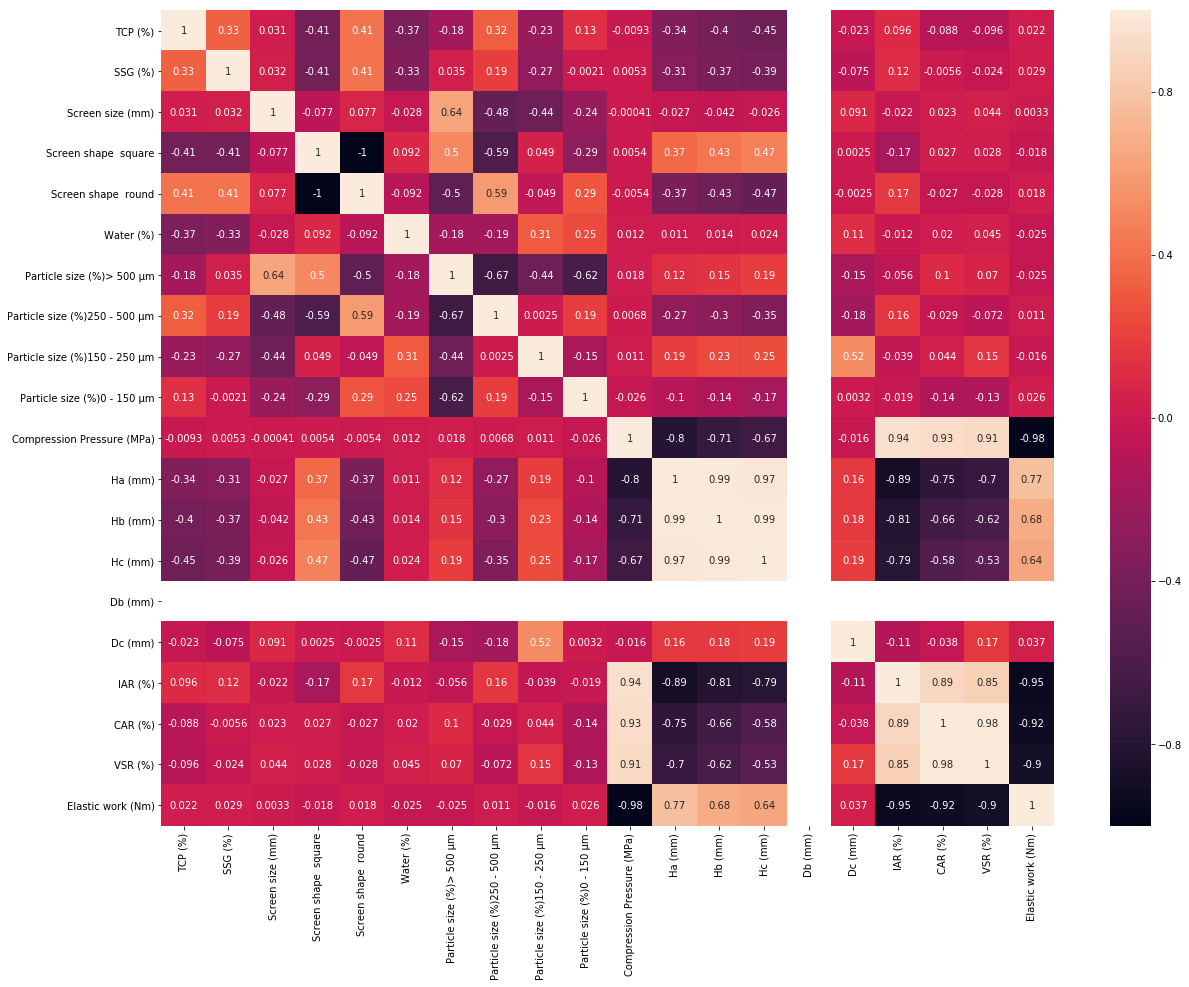

In [8]:
plot.rcParams["figure.figsize"] = [20,15]
sns.heatmap(data_L.corr(), annot= True)

In [10]:
X = pd.DataFrame(data_L[['TCP (%)','Compression Pressure (MPa)','Screen shape  round']])
y = pd.DataFrame(data_L['Hb (mm)'])

model = LinearRegression()
scores = []
mse_scores = []
kfold = KFold(n_splits=2, shuffle=True, random_state=42)

for i, (train, test) in enumerate(kfold.split(X, y)):
    model.fit(X.iloc[train,:], y.iloc[train,:])
    score = model.score(X.iloc[test,:], y.iloc[test,:])
    scores.append(score)
    #print(model.predict(X.iloc[test,:]).shape)
    #print(y.iloc[test,:].shape)
    
    #mse_scores.append(mse_score)

y_pred = cross_val_predict(model, X, y, cv=2)
mse_score = np.round(metrics.mean_squared_error(y,y_pred),2)
print(scores)
print(np.mean(scores))
print('MSE for test data:',mse_score)

[0.7456195011175617, 0.7655240412839623]
0.755571771200762
MSE for test data: 0.03


In [14]:
X = pd.DataFrame(data_L[['TCP (%)','Compression Pressure (MPa)','Screen shape  round','Particle size (%)150 - 250 µm']])
y = pd.DataFrame(data_L['Hb (mm)'])

model = LinearRegression()
scores = []
mse_scores = []
kfold = KFold(n_splits=2, shuffle=True, random_state=42)

for i, (train, test) in enumerate(kfold.split(X, y)):
    model.fit(X.iloc[train,:], y.iloc[train,:])
    score = model.score(X.iloc[test,:], y.iloc[test,:])
    scores.append(score)
    #print(model.predict(X.iloc[test,:]).shape)
    #print(y.iloc[test,:].shape)
    
    #mse_scores.append(mse_score)

y_pred = cross_val_predict(model, X, y, cv=2)
mse_score = np.round(metrics.mean_squared_error(y,y_pred),2)
print(scores)
print(np.mean(scores))
print('MSE for test data:',mse_score)

[0.7771634481623798, 0.7974769368566473]
0.7873201925095136
MSE for test data: 0.03


In [15]:
from sklearn.cross_validation import train_test_split, ShuffleSplit
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

C:\Users\visha\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [16]:
X = pd.DataFrame(data_L[['TCP (%)','Compression Pressure (MPa)','Screen shape  round','Particle size (%)150 - 250 µm']])
y = pd.DataFrame(data_L['Hb (mm)'])

X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=4)
model_rr = Ridge(alpha=0.01)
model_rr.fit(X_train, y_train)

Ridge_train_score = model_rr.score(X_train,y_train)
Ridge_test_score = model_rr.score(X_test, y_test)
Predict_test_ridge = model_rr.predict(X_test)

print("Ridge regression train score:", Ridge_train_score)
print("Ridge regression test score:", Ridge_test_score)
print('RSquare value(test):',np.round(model_rr.score(X_test, y_test)*100,2))
print('MSE for test data:',np.round(metrics.mean_squared_error(y_test, Predict_test_ridge),2))

Ridge regression train score: 0.823472542846983
Ridge regression test score: 0.6683152468608816
RSquare value(test): 66.83
MSE for test data: 0.01


In [17]:
X = pd.DataFrame(data_L[['TCP (%)','Compression Pressure (MPa)','Screen shape  round','Particle size (%)150 - 250 µm',]])
y = pd.DataFrame(data_L['Hb (mm)'])

X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=4)
model_lr = Lasso()
model_lr.fit(X_train, y_train)
coeff_used = np.sum(model_lr.coef_!=0)

Lasso_train_score = model_lr.score(X_train,y_train)
Lasso_test_score = model_lr.score(X_test, y_test)
Predict_test_Lasso = model_lr.predict(X_test)

print("Lasso regression train score:", Lasso_train_score)
print("Lasso regression test score:", Lasso_test_score)
print("number of features used: ", coeff_used)
print('RSquare value(test):',np.round(model_lr.score(X_test, y_test)*100,2))
print('MSE for test data:',np.round(metrics.mean_squared_error(y_test, Predict_test_Lasso),2))

Lasso regression train score: 0.5334123025443718
Lasso regression test score: 0.34743217339094756
number of features used:  1
RSquare value(test): 34.74
MSE for test data: 0.02


In [18]:
X = pd.DataFrame(data_L[['TCP (%)','Compression Pressure (MPa)','Screen shape  round','Particle size (%)150 - 250 µm',]])
y = pd.DataFrame(data_L['Hb (mm)'])

X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=4)
model_enr = ElasticNet()
model_enr.fit(X_train, y_train)

ElasticNet_train_score = model_enr.score(X_train,y_train)
ElasticNet_test_score = model_enr.score(X_test, y_test)
Predict_test_ElasticNet = model_enr.predict(X_test)

print("ElasticNet regression train score:", ElasticNet_train_score)
print("ElasticNet regression test score:", ElasticNet_test_score)
print('RSquare value(test):',np.round(model_enr.score(X_test, y_test)*100,2))
print('MSE for test data:',np.round(metrics.mean_squared_error(y_test, Predict_test_ElasticNet),2))

ElasticNet regression train score: 0.5484750529253313
ElasticNet regression test score: 0.3484743557639517
RSquare value(test): 34.85
MSE for test data: 0.02


In [19]:
Data_P = data.loc['1P':'48 P']

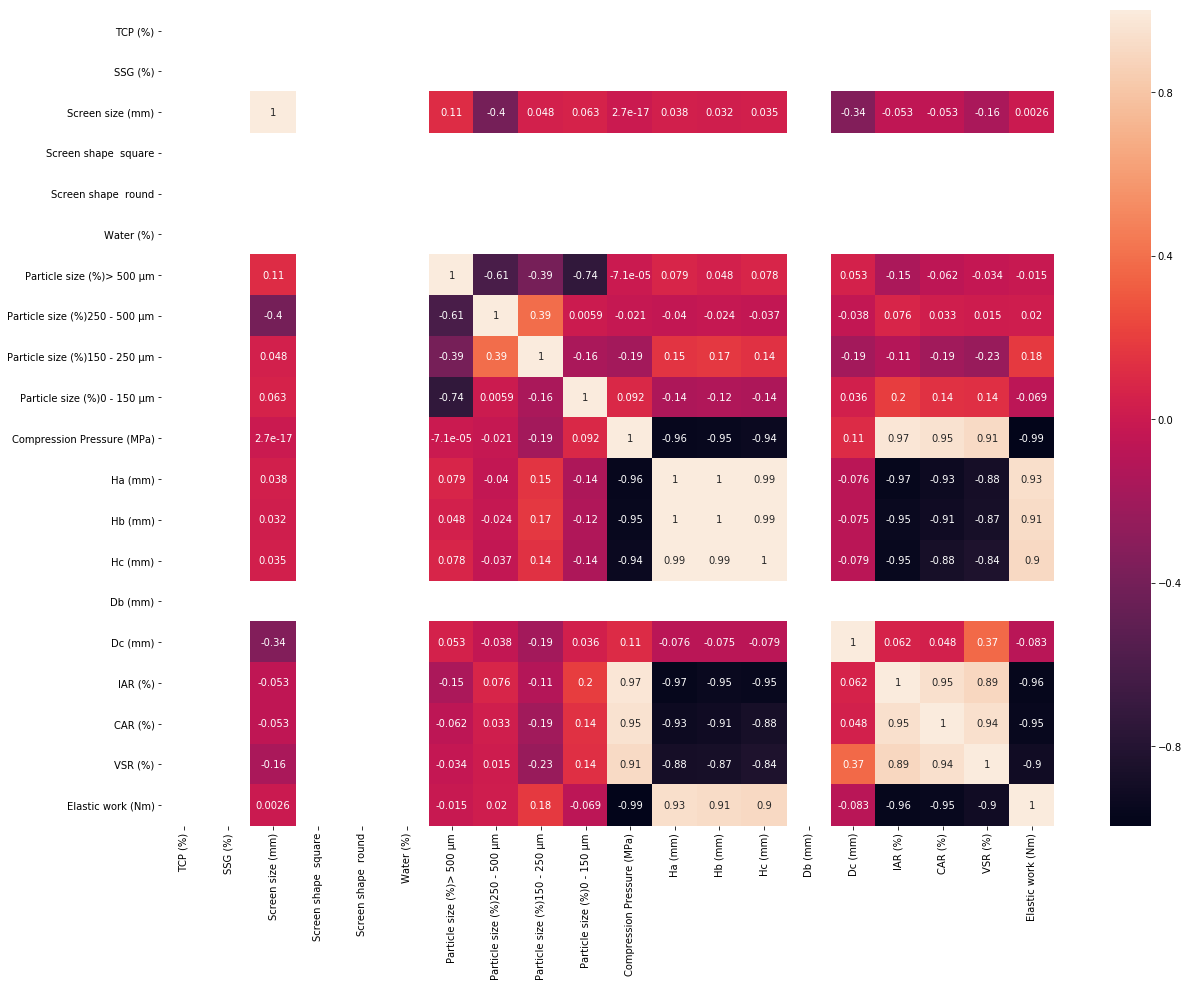

In [20]:
plot.rcParams["figure.figsize"] = [20,15]
sns.heatmap(Data_P.corr(), annot= True)

In [41]:
X = pd.DataFrame(Data_P[['TCP (%)','Compression Pressure (MPa)','Screen shape  round']])
y = pd.DataFrame(Data_P['Hb (mm)'])

model = LinearRegression()
scores = []
kfold = KFold(n_splits=2, shuffle=True, random_state=42)

for i, (train, test) in enumerate(kfold.split(X, y)):
    model.fit(X.iloc[train,:], y.iloc[train,:])
    score = model.score(X.iloc[test,:], y.iloc[test,:])
    scores.append(score)

y_pred = cross_val_predict(model, X, y, cv=2)
mse_score = np.round(metrics.mean_squared_error(y,y_pred),3)
print('Individual scores:',scores)
print('Average score:',np.mean(scores))
print('MSE:',mse_score)

Individual scores: [0.8782070028483802, 0.8904320024359091]
Average score: 0.8843195026421447
MSE: 0.004


In [27]:
X = pd.DataFrame(Data_P['Compression Pressure (MPa)'])
y = pd.DataFrame(Data_P['Hb (mm)'])

X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=4)
model_rr = Ridge(alpha=0.01)
model_rr.fit(X_train, y_train)

Ridge_train_score = model_rr.score(X_train,y_train)
Ridge_test_score = model_rr.score(X_test, y_test)
Predict_test_ridge = model_rr.predict(X_test)

print("Ridge regression train score:", Ridge_train_score)
print("Ridge regression test score:", Ridge_test_score)
print('RSquare value(test):',np.round(model_rr.score(X_test, y_test)*100,2))
print('MSE for test data:',np.round(metrics.mean_squared_error(y_test, Predict_test_ridge),2))

Ridge regression train score: 0.9151989517509473
Ridge regression test score: 0.8544885854719668
RSquare value(test): 85.45
MSE for test data: 0.01


In [28]:
X = pd.DataFrame(Data_P[['TCP (%)','Compression Pressure (MPa)','Screen shape  round']])
y = pd.DataFrame(Data_P['Hb (mm)'])

X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=4)
model_lr = Lasso()
model_lr.fit(X_train, y_train)
coeff_used = np.sum(model_lr.coef_!=0)

Lasso_train_score = model_lr.score(X_train,y_train)
Lasso_test_score = model_lr.score(X_test, y_test)
Predict_test_Lasso = model_lr.predict(X_test)

print("Lasso regression train score:", Lasso_train_score)
print("Lasso regression test score:", Lasso_test_score)
print("number of features used: ", coeff_used)
print('RSquare value(test):',np.round(model_lr.score(X_test, y_test)*100,2))
print('MSE for test data:',np.round(metrics.mean_squared_error(y_test, Predict_test_Lasso),2))

Lasso regression train score: 0.8831362553560126
Lasso regression test score: 0.8081538625306226
number of features used:  1
RSquare value(test): 80.82
MSE for test data: 0.01


In [30]:
X = pd.DataFrame(Data_P['Compression Pressure (MPa)'])
y = pd.DataFrame(Data_P['Hb (mm)'])

X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=4)
model_enr = ElasticNet()
model_enr.fit(X_train, y_train)

ElasticNet_train_score = model_enr.score(X_train,y_train)
ElasticNet_test_score = model_enr.score(X_test, y_test)
Predict_test_ElasticNet = model_enr.predict(X_test)

print("ElasticNet regression train score:", ElasticNet_train_score)
print("ElasticNet regression test score:", ElasticNet_test_score)
print('RSquare value(test):',np.round(model_enr.score(X_test, y_test)*100,2))
print('MSE for test data:',np.round(metrics.mean_squared_error(y_test, Predict_test_ElasticNet),2))

ElasticNet regression train score: 0.9071244708691492
ElasticNet regression test score: 0.8381227638369297
RSquare value(test): 83.81
MSE for test data: 0.01


# Commercial scale sample runs

In [31]:
Data_C = data.loc['1 C':'36 C']

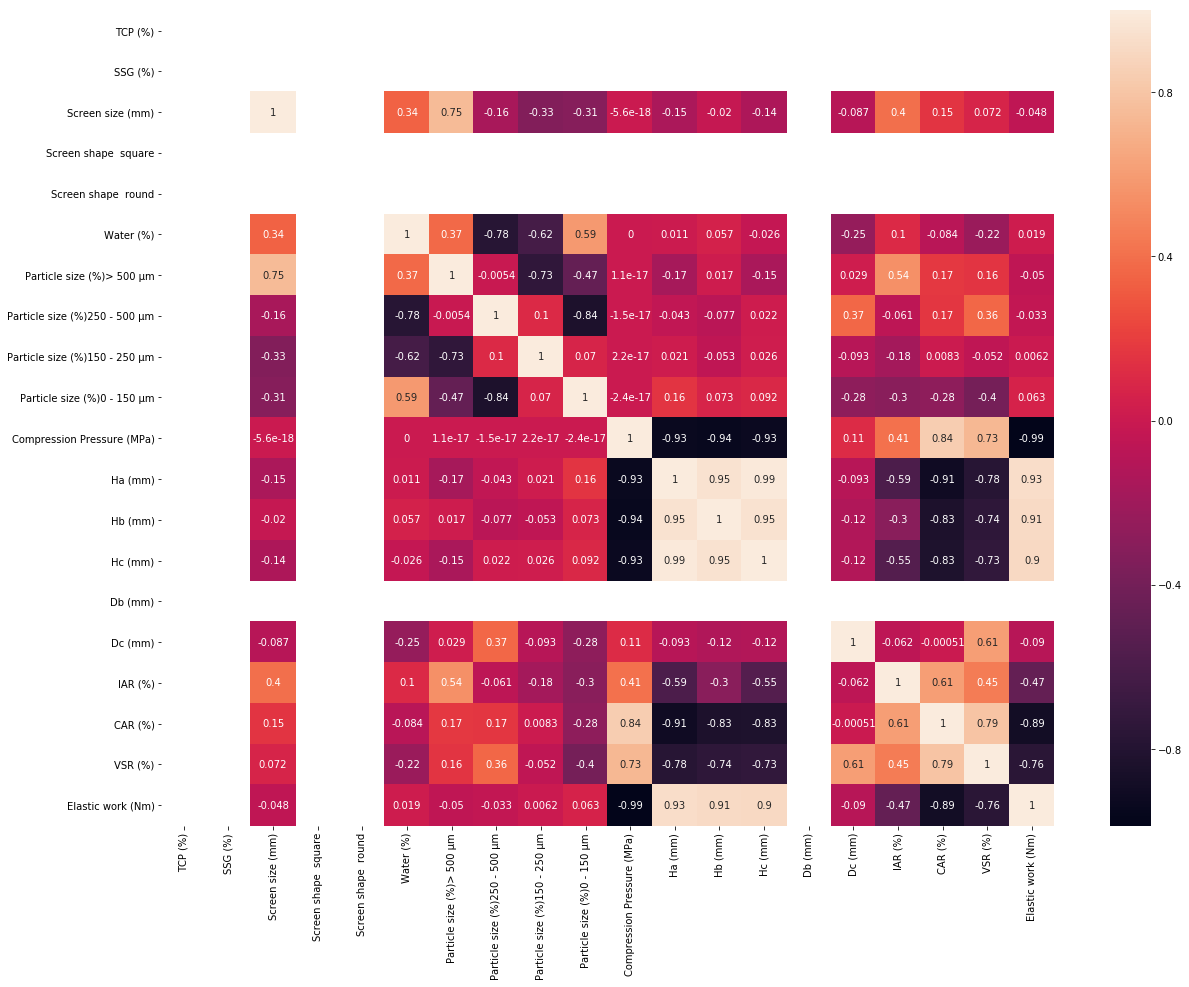

In [32]:
plot.rcParams["figure.figsize"] = [20,15]
sns.heatmap(Data_C.corr(), annot= True)

In [43]:
X = pd.DataFrame(Data_C[['TCP (%)','Compression Pressure (MPa)','Screen shape  round']])
y = pd.DataFrame(Data_C['Hb (mm)'])
model = LinearRegression()
scores = []
kfold = KFold(n_splits=2, shuffle=True, random_state=42)

for i, (train, test) in enumerate(kfold.split(X, y)):
    model.fit(X.iloc[train,:], y.iloc[train,:])
    score = model.score(X.iloc[test,:], y.iloc[test,:])
    scores.append(score)
    
y_pred = cross_val_predict(model, X, y, cv=2)
mse_score = np.round(metrics.mean_squared_error(y,y_pred),4)
print('Individual scores:',scores)
print('Average score:',np.mean(scores))
print('MSE:',mse_score)

Individual scores: [0.8427825700928269, 0.870809793278736]
Average score: 0.8567961816857814
MSE: 0.0042


In [42]:
X = pd.DataFrame(Data_C[['Compression Pressure (MPa)']])
y = pd.DataFrame(Data_C['Hb (mm)'])

X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=4)
model_rr = Ridge(alpha=0.01)
model_rr.fit(X_train, y_train)

Ridge_train_score = model_rr.score(X_train,y_train)
Ridge_test_score = model_rr.score(X_test, y_test)
Predict_test_ridge = model_rr.predict(X_test)

print("Ridge regression train score:", Ridge_train_score)
print("Ridge regression test score:", Ridge_test_score)
print('RSquare value(test):',np.round(model_rr.score(X_test, y_test)*100,2))
print('MSE for test data:',np.round(metrics.mean_squared_error(y_test, Predict_test_ridge),4))

Ridge regression train score: 0.8888627471227832
Ridge regression test score: 0.8699248444292851
RSquare value(test): 86.99
MSE for test data: 0.0036


In [39]:
X = pd.DataFrame(Data_C[['Compression Pressure (MPa)']])
y = pd.DataFrame(Data_C['Hb (mm)'])

X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=4)
model_lr = Lasso()
model_lr.fit(X_train, y_train)
coeff_used = np.sum(model_lr.coef_!=0)

Lasso_train_score = model_lr.score(X_train,y_train)
Lasso_test_score = model_lr.score(X_test, y_test)
Predict_test_Lasso = model_lr.predict(X_test)

print("Lasso regression train score:", Lasso_train_score)
print("Lasso regression test score:", Lasso_test_score)
print("number of features used: ", coeff_used)
print('RSquare value(test):',np.round(model_lr.score(X_test, y_test)*100,2))
print('MSE for test data:',np.round(metrics.mean_squared_error(y_test, Predict_test_Lasso),4))

Lasso regression train score: 0.8697456081792678
Lasso regression test score: 0.8666073347619581
number of features used:  1
RSquare value(test): 86.66
MSE for test data: 0.0037


In [40]:
X = pd.DataFrame(Data_C[['Compression Pressure (MPa)']])
y = pd.DataFrame(Data_C['Hb (mm)'])

X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=4)
model_enr = ElasticNet()
model_enr.fit(X_train, y_train)

ElasticNet_train_score = model_enr.score(X_train,y_train)
ElasticNet_test_score = model_enr.score(X_test, y_test)
Predict_test_ElasticNet = model_enr.predict(X_test)

print("ElasticNet regression train score:", ElasticNet_train_score)
print("ElasticNet regression test score:", ElasticNet_test_score)
print('RSquare value(test):',np.round(model_enr.score(X_test, y_test)*100,2))
print('MSE for test data:',np.round(metrics.mean_squared_error(y_test, Predict_test_ElasticNet),3))

ElasticNet regression train score: 0.8840443932358665
ElasticNet regression test score: 0.8736221858874026
RSquare value(test): 87.36
MSE for test data: 0.003
